In [261]:
import numpy as np
from sklearn.datasets import make_blobs,make_circles,make_classification
import matplotlib.pyplot as plt

In [262]:
# X,y = make_blobs(1000,centers=2)
X,y = make_circles(1000,noise=0.02,factor=0.8)
# X,y = make_classification(1000,2,n_classes=2,n_informative=2,n_redundant=0)

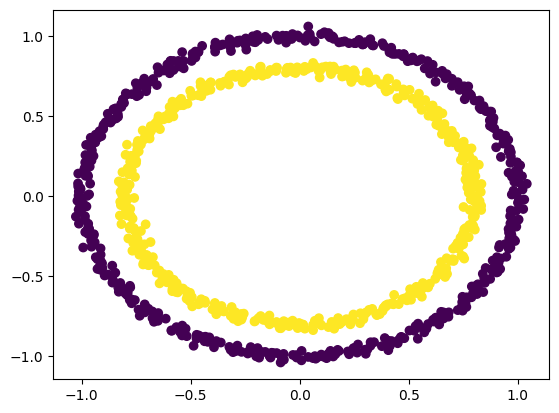

In [263]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [264]:
class NN:
    def __init__(self,in_dim=2,hlayers=[],out_dim=2):
        self.weights = []
        self.bias = []
        self.weights.append(np.random.normal(0,np.sqrt(2/in_dim),size=(in_dim,hlayers[0])))
        for i in range(len(hlayers)-1):
            self.weights.append(np.random.normal(0,np.sqrt(2/hlayers[i]),size=(hlayers[i],hlayers[i+1])))

        self.weights.append(np.random.normal(0,np.sqrt(2/hlayers[-1]),size=(hlayers[-1],out_dim)))

        for i in range(len(hlayers)):
            self.bias.append(np.ones(shape=(hlayers[i],1),dtype='f8'))

        self.bias.append(np.ones(shape=(out_dim,1),dtype='f8'))

    def activation(self,Z):
        return 1/(1+np.exp(-Z))
    def forwardProp(self,X):
        self.actv = []
        self.actv.append(self.activation(self.weights[0].T@X.T+self.bias[0]))
        for i in range(1,len(self.weights)):
            self.actv.append(self.activation(self.weights[i].T@self.actv[-1]+self.bias[i]))
        return self.actv[-1]

    def predict(self,X):
        ypred = self.forwardProp(X).reshape((-1,))
        ypred[ypred < 0.5] = 0
        ypred[ypred >= 0.5] = 1
        return ypred
    def derA(self,a):
        return a*(1-a)
    
    def backprop(self,X,y,lr = 0.01,epochs=10):
        for e in range(epochs):
            grads = []
            dels = []
            self.forwardProp(X)
            dels.append(self.actv[-1].T-y)
            grads.append(self.actv[-2]@dels[-1])
            for i in range(len(self.weights) - 1,1,-1):
                dels.append(((dels[-1]@self.weights[i].T).T*self.derA(self.actv[i-1])).T)
                grads.append(self.actv[i-2]@dels[-1])
            
            dels.append(((dels[-1]@self.weights[1].T).T*self.derA(self.actv[0])).T)
            grads.append(X.T@dels[-1])

            for i in range(len(self.weights)):
                self.weights[i] = self.weights[i] - lr*grads[-i-1]
                self.bias[i] = self.bias[i] - lr*np.sum(dels[-i-1],axis=0,keepdims=True).T
        

In [277]:
y = y.reshape((-1,1))
y.shape

(1000, 1)

In [278]:
clf = NN(2,[64,32,10],1)

In [279]:
clf.weights

[array([[-0.2888603 , -1.46720768, -0.56898275,  0.420024  ,  0.18557535,
         -1.6941211 , -1.36296217,  0.02262913, -0.1035856 , -1.71620708,
         -0.71883063,  0.18581684, -0.91031678,  1.89899217,  1.20146742,
          0.08213552, -1.50392195,  0.14671268, -0.17062888, -0.94953394,
          0.46791196, -0.48499126,  1.08438351,  0.04250975,  1.00098759,
         -0.4742496 ,  0.30455665,  0.48660801,  0.19012502, -1.26905836,
         -1.13887281,  1.60729872,  0.25785037, -0.19333149,  0.03609405,
         -0.80946999,  0.1222458 , -0.62452068, -0.29099077,  0.68455641,
          0.56813656, -0.3044582 ,  0.47407109,  1.00339353,  0.39673354,
         -0.35605476, -1.37503345,  0.50786583,  1.36017287,  0.40994449,
         -1.81012314,  0.50928394, -0.98659143, -0.56725401,  2.14451722,
         -1.16122557,  1.20348563,  0.05061355, -1.64502447,  0.78164401,
         -2.36594186, -0.39570221, -1.62905684,  0.01132016],
        [-0.6272664 , -0.88277726, -0.63660488, -1

In [280]:
out = clf.forwardProp(X)

In [281]:
out.shape

(1, 1000)

In [282]:
clf.backprop(X,y,lr = 0.01,epochs=10000)

In [283]:
clf.weights

[array([[-0.28740022, -1.46946823, -0.56342621,  0.42126015,  0.18595694,
         -1.70939268, -1.36113474,  0.02255577, -0.10189544, -1.72930399,
         -0.71976713,  0.18526679, -0.89776005,  1.8985812 ,  1.20328252,
          0.07756659, -1.50470823,  0.1489593 , -0.16603235, -0.95091125,
          0.46774434, -0.47674179,  1.08994964,  0.04089232,  1.00703786,
         -0.47169673,  0.30242018,  0.48564987,  0.19020929, -1.26668071,
         -1.13803335,  1.61595972,  0.26146647, -0.1888838 ,  0.03300708,
         -0.8143416 ,  0.12125782, -0.63077136, -0.28551681,  0.68983384,
          0.57654635, -0.30370742,  0.47125899,  0.99063038,  0.39580994,
         -0.35936924, -1.39141144,  0.51298853,  1.36790216,  0.40691759,
         -1.80968185,  0.50832657, -0.98865818, -0.55906101,  2.14976595,
         -1.1745504 ,  1.19927514,  0.05102819, -1.64869485,  0.77937836,
         -2.36775476, -0.41663443, -1.63326759,  0.01224383],
        [-0.62360951, -0.88304177, -0.63006715, -1

In [284]:
ypred = clf.predict(X)

In [285]:
np.mean(y.reshape((-1,)) == ypred)

0.5

In [274]:
from sklearn.neural_network import MLPClassifier

In [275]:
clf = MLPClassifier((64,32,10),max_iter=1000)
clf.fit(X,y)

C:\Users\abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(64, 32, 10), max_iter=1000)

In [276]:
clf.score(X,y)

1.0